<a href="https://colab.research.google.com/github/Hironobu-Kawaguchi/HappyRedHair/blob/main/DEMO_SimpleDetour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# matplotlibで日本語を使うためのもの
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1 MB 4.0 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=6952b501d7b82e1e555c25586140be6b890abacf6007f0fea91b4def71793814
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import japanize_matplotlib

In [11]:
# 20個のスポットに対応する点を作る
np.random.seed(1)
x_array = np.random.randint(0, 5000, 20)
y_array = np.random.randint(0, 5000, 20)

In [12]:
# 各スポットの情報
spot_list = ['カフェ0', 'カフェ1', 'カフェ2', 'カフェ3', 'カフェ4', 
             'カフェ5', 'カフェ6', 'カフェ7', 'カフェ8', 'カフェ9', 
             'パン屋0', 'パン屋1', 'パン屋2', 'パン屋3', 'パン屋4', 
             'パン屋5', 'パン屋6', 'パン屋7', 'パン屋8', 'パン屋9']

# どんな目的でそのスポットを利用するか
purpose_list = ['ゆっくり', 'ゆっくり', 'ゆっくり', 'ゆっくり', 'ゆっくり', 
                'ゆっくり', 'ゆっくり', 'ゆっくり', 'ゆっくり', 'ゆっくり', 
                'ゆっくり', 'ゆっくり', 'ゆっくり', 'ゆっくり', 'ゆっくり', 
                'ゆっくり', 'ゆっくり', 'ゆっくり', 'ゆっくり', 'ゆっくり']

# そのスポットの雰囲気はどうか
mood_list = ['静か', '静か', '静か', '静か', '静か', 
             '静か', '静か', '静か', '静か', '静か', 
             '静か', '静か', '静か', '静か', '静か', 
             '静か', '静か', '静か', '静か', '静か']

# そのスポットの平均滞在時間
time_list = [30, 60, 25, 20, 30, 
             30, 45, 30, 30, 45, 
             20, 15, 10, 10, 15, 
             15, 20, 15, 15, 10]

# そのスポットからのコメントや情報
comment_list = ['ケーキが余っています', 'ショートケーキ3個', 'モンブラン1個', '感染対策バッチリ', '紅茶と相性バッチリなモンブラン', 
                'ケーキ売れるまで閉めません', '瀧先生います', '自家製コーヒー', 'あの長谷川選手のお気に入り！', 'この街がスマートになる前からやっています', 
                'アンパンマンパンはパンなん？', '軽食にいかが？', 'サンドイッチが最高', '結構余ってます', '一番人気はメロンパン！', 
                'あんぱんがおすすめ！', '雰囲気いい', '高級食パンおいてます', 'あと3個です', 'テイクアウト専用']

In [13]:
# 2地点間の距離やかかる時間を計算する関数
def culc_minute(my_x, my_y):
    distance_array = np.sqrt((x_array - my_x)**2 + (y_array - my_y)**2)
    minute_array = np.round(distance_array / 125)

    possible_array = np.array(time_list) - minute_array*2
    return minute_array.astype(int), possible_array.astype(int)

# メインの関数    
def Detour():
    print("現在地 x (0<x<5000)を入力してください．")
    from_x = int(input())

    print("\n現在地 y (0<y<5000)を入力してください．")
    from_y = int(input())

    print("\n目的地 x (0<x<5000)を入力してください．")
    to_x = int(input())

    print("\n目的地 y (0<y<5000)を入力してください．")
    to_y = int(input())

    print("\n空き時間（分）を入力してください．")
    my_time = float(input())

    print("\n目的を ['ゆっくり', '食事'] から選択してください（デモでは「ゆっくり」のみ動作します）．")
    my_purpose = input()

    print("\n気分を ['静か', '賑やか'] から選択してください（デモでは「静か」のみ動作します）．")
    my_mood = input()

    from_minute_array, from_possible_array = culc_minute(from_x, from_y)
    to_minute_array, to_possible_array = culc_minute(to_x, to_y)

    df_all = pd.DataFrame(list(zip(spot_list, from_minute_array, to_minute_array, purpose_list, mood_list, time_list, comment_list)), columns = ['spot', 'here_to_spot', 'spot_to_distination', 'purpose', 'mood', 'time', 'comment'])

    df_candidate = df_all[(df_all['purpose'] == my_purpose) & (df_all['mood'] == my_mood) & (df_all['here_to_spot'] + df_all['time'] + df_all['spot_to_distination'] <= my_time)]

    index_list = df_candidate.index.tolist()
    
    if len(index_list) == 0:
        print('利用可能なスポットがありません．')

    plt.figure(figsize=(7, 7))

    for i in range(len(index_list)):
        plt.plot([from_x, x_array[index_list[i]]], [from_y, y_array[index_list[i]]], c='blue')
        plt.plot([to_x, x_array[index_list[i]]], [to_y, y_array[index_list[i]]], c='blue')
        plt.text(x_array[index_list[i]]+100, y_array[index_list[i]]+100, "{}（お店からのコメント:{}）".format(df_candidate.loc[index_list[i], "spot"], df_candidate.loc[index_list[i], "comment"]))
    
    plt.scatter(from_x, from_y, c='red', s=100)
    plt.scatter(to_x, to_y, c='green', s=100)
    plt.scatter(x_array, y_array, c='skyblue', s=50)
    plt.scatter(x_array[index_list], y_array[index_list], c='darkorange', s=100)
    
    plt.xlim(-500, 5500)
    plt.ylim(-500, 5500)
    plt.grid(True)
    plt.show()

現在地 x (0<x<5000)を入力してください．
500

現在地 y (0<y<5000)を入力してください．
2500

目的地 x (0<x<5000)を入力してください．
4500

目的地 y (0<y<5000)を入力してください．
2500

空き時間（分）を入力してください．
60

目的を ['ゆっくり', '食事'] から選択してください（デモでは「ゆっくり」のみ動作します）．
ゆっくり

気分を ['静か', '賑やか'] から選択してください（デモでは「静か」のみ動作します）．
静か


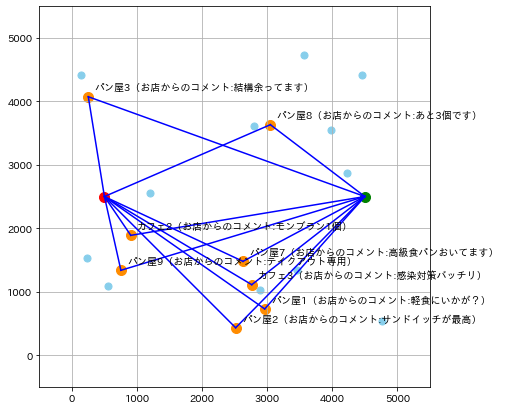

In [14]:
Detour()